# Energy Consumption Prediction for the Buildings in New York City

Name: Jugal Pumbhadia  
Course: Machine Learning (CS-GY 6923)  
NetID: jp6988 

# Background Information

New York City is the most populous metropolitan area of United States. In addition to such huge population, it is also a global cultural, financial, entertainment and media centre, attracting millions of people every year. Having more number people generally leads to high energy and resource consumption in the city. Managing such humongous quanitites of energy resources comes with its own set of problems such as resource planning, optimization and reducing its energy wastage. It is essential that the policymakers should be able to accurately predict which kind of buildings are having high energy usage and identify patterns, so that they can formulate policies to promote sustainable usage of energy resources. 

# Project Goals

The project aims to build a model which can predict the energy usage based on the property type and its consumption patterns and thereby aiding the government and academia in their efforts to minimize energy wastage. The project goal is to accurately predict the energy usage which is basically a numeric variable. In the project, apart from machine learning, detailed exploratory analysis is also performed to identify patterns and clues regarding the property type, resource usage and location data.

# Data Science Processes

1) Data Cleaning  
2) Handling Null Values, Data Reduction and Transformation  
3) Outlier Handling  
4) Exploratory Data Analysis (EDA)  
5) Standardization and Encoding  
6) Model Selection and Training  
7) Model Evaluation 

# Data Cleaning

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset

df=pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020__20231121.csv',
              low_memory=False)
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,...,Number of Active IT Meters,Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,Longitude,Latitude
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009970029,1022631,1155 Avenue of the Americas,Manhattan,10036,...,0,5/20/2021 14:43,5/20/2021 14:44,MANHATTAN,105.0,4.0,119.0,Midtown-Midtown South,-73.982826,40.756631
1,8139,200,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1013150001,1037545,200 East 42nd St.,Manhattan,10017,...,0,5/20/2021 14:43,5/20/2021 14:44,MANHATTAN,106.0,4.0,88.0,Turtle Bay-East Midtown,-73.974306,40.750698
2,8604,114,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009990019,1022667,114 West 47th st,Manhattan,10036,...,0,5/21/2021 16:10,5/21/2021 16:13,MANHATTAN,105.0,4.0,125.0,Midtown-Midtown South,-73.982504,40.758310
3,8841,733,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1013190047,1037596,733 Third Avenue,Manhattan,10017,...,0,5/20/2021 14:43,5/20/2021 14:44,MANHATTAN,106.0,4.0,90.0,Turtle Bay-East Midtown,-73.972753,40.753074
4,11809,Conde Nast Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009950005,1085682,4 Times Square,Manhattan,10036,...,0,5/10/2021 18:30,5/10/2021 18:34,MANHATTAN,105.0,4.0,119.0,Midtown-Midtown South,-73.986244,40.756181


In [3]:
# Checking null/empty values

df.isna().sum()

Property Id               0
Property Name             0
Parent Property Id        0
Parent Property Name      0
Year Ending               0
                       ... 
Council District        989
Census Tract            989
NTA                     989
Longitude               989
Latitude                989
Length: 250, dtype: int64

In [4]:
# Some features have not not null values as NaN. Instead, it is in the form of "Not Available".
# Creating a function findNa() to handle those not available values

def findNa(data):
    cols_with_na=data.eq("Not Available").any()
    na_list=cols_with_na[cols_with_na].index.to_list()
    na_list_count=df[na_list].eq('Not Available').sum()
    return na_list_count

In [5]:
findNa(df)

NYC Borough, Block and Lot (BBL)                              76
NYC Building Identification Number (BIN)                     112
Address 1                                                      4
Primary Property Type - Portfolio Manager-Calculated          10
National Median Reference Property Type                       10
                                                           ...  
Last Modified Date - Electric Meters                        1052
Last Modified Date - Gas Meters                             2450
Last Modified Date - Non-Electric Non-Gas Energy Meters    17768
Last Modified Date - Water Meters                           5777
Last Modified Date - Property Use                             16
Length: 210, dtype: int64

In [6]:
df.shape

(28067, 250)

#### There are total 28067 records and 250 features initially in the dataset.

### Removing irrelevant features

All of the below columns are irrelevant to our analysis. This includes sensor data, redundant location information, dates of reporting, data flages, alert flages, population tracts etc. These information was sourced from the data dictionary of the dataset and then I decided to remove them.

In [7]:
irrelevant_features=[
    'City', 'Parent Property Id','Parent Property Name', 'Year Ending', 'NYC Borough, Block and Lot (BBL)', 'NYC Building Identification Number (BIN)', 
    'Primary Property Type - Self Selected', 'National Median Reference Property Type', 'List of All Property Use Types at Property', 
    '2nd Largest Property Use Type', '3rd Largest Property Use Type', 'Number of Buildings', 'National Median ENERGY STAR Score', 
    'Target ENERGY STAR Score', 'Reason(s) for No Score', 'ENERGY STAR Certification - Year(s) Certified (Score)', 'ENERGY STAR Certification - Eligibility',
    'ENERGY STAR Certification - Last Approval Date', 'LEED US Project ID', 'Estimated Data Flag - Electricity (Grid Purchase)',
    'Estimated Data Flag - Natural Gas', 'Estimated Data Flag - Fuel Oil (No. 1)', 'Estimated Data Flag - Fuel Oil (No. 2)', 
    'Estimated Data Flag - Fuel Oil (No. 4)', 'Estimated Data Flag - Fuel Oil (No. 5 and No. 6)', 'Estimated Data Flag - District Steam',
    'Estimated Data Flag - Municipally Supplied Potable Water: Mixed Indoor/Outdoor Use', 'Estimated Values - Energy',
    'Estimated Values - Water', 'Alert - Data Center Issue (with Estimates, IT Configuration, or IT Meter)', 
    'Alert - Energy Meter has less than 12 full calendar months of data', 'Alert - Energy Meter has gaps', 'Alert - Energy Meter has overlaps',
    'Alert - Energy - No meters selected for metrics', 'Alert - Energy Meter has single entry more than 65 days', 
    'Alert - Water Meter has less than 12 full calendar months of data', 'Alert - Property has no uses', 'Default Values', 
    'Temporary Values', 'Third Party Certification', 'Third Party Certification Date Anticipated', 'Third Party Certification Date Achieved',
    'Last Modified Date - Property', 'Last Modified Date - Electric Meters', 'Last Modified Date - Gas Meters', 'Last Modified Date - Non-Electric Non-Gas Energy Meters',
    'Last Modified Date - Water Meters', 'Last Modified Date - Property Use', 'Number of Active Energy Meters - Used to Compute Metrics', 
    'Number of Active Energy Meters - Not Used to Compute Metrics', 'Generation Date', 'Release Date','Multifamily Housing - Government Subsidized Housing',
    'Multifamily Housing - Gross Floor Area (ft²)', 'Multifamily Housing - Number of Bedrooms', 'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Laundry Hookups in All Units', 'Multifamily Housing - Number of Laundry Hookups in Common Area(s)',
    'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)',
    'Multifamily Housing - Total Number of Residential Living Units', 'Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)',
    'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)',
    'Multifamily Housing - Percent That Can Be Cooled', 'Multifamily Housing - Percent That Can Be Heated',
    'Multifamily Housing - Resident Population Type', 'Number of Active Energy Meters - Total', 'Number of Active IT Meters', 
    'Community Board', 'Council District', 'Census Tract'
]

In [8]:
df.drop(columns=irrelevant_features, inplace=True)

In [9]:
df.shape

(28067, 178)

### Removing Redundant Features 

In [10]:
# The features like Direct and Indirect Gas Emission along with other repeative features are redundant in the dataset.
# We already have features like Total Emissions, Net Emissions, Total Water Usage, Property type calculated by the system and likewise.
# Hence all such redundant features are removed.

red_features=['Direct GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions Intensity (kgCO2e/ft²)',
              'Indirect GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions Intensity (kgCO2e/ft²)',
              'Largest Property Use Type', 'Green Power - Offsite (kWh)',
              'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)', 'Property GFA - Calculated (Buildings and Parking) (ft²)', 'Property GFA - Calculated (Buildings) (ft²)',
              'Indoor Water Use (All Water Sources) (kgal)', 'Municipally Supplied Potable Water - Indoor Use (kgal)'
             ]
df.drop(columns=red_features, inplace=True)

In [11]:
df.shape

(28067, 167)

### Converting "Not Available" values to null values

In [12]:
df.replace("Not Available", np.nan, inplace=True)

In [13]:
df.isna().sum().nlargest(20)

Barracks- Gross Floor Area (ft²)                               28067
Convention Center - Gross Floor Area (ft²)                     28065
Propane Use (kBtu)                                             28064
District Hot Water Use (kBtu)                                  28064
Data Center - PUE                                              28064
Data Center - National Median PUE                              28064
Municipally Supplied Potable Water - Outdoor Use (kgal)        28059
Outdoor Water Use (All Water Sources) (kgal)                   28058
Ambulatory Surgical Center - Gross Floor Area (ft²)            28056
Wastewater Treatment Plant - Gross Floor Area (ft²)            28053
Energy/Power Station - Gross Floor Area (ft²)                  28052
Wholesale Club/Supercenter- Gross Floor Area (ft²)             28052
Wholesale Club/Supercenter- Exterior Entrance to the Public    28052
Fuel Oil #1 Use (kBtu)                                         28051
Courthouse - Gross Floor Area (ft²

#### As we can see above, there are many features with exceptionally high amount of null values.

### Finding features with greater than 80% values as null

In [14]:
threshold=0.8
def find_pct_na(df):
    missing_pct=(df.isnull().sum())/len(df)
    cols_with_high_na=missing_pct[missing_pct>threshold].index.tolist()
    return cols_with_high_na

In [15]:
features_high_na=find_pct_na(df)
features_high_na

['3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Propane Use (kBtu)',
 'District Steam Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kWh)',
 'Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu)',
 'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
 'Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh)',
 'Annual Maximum Demand (kW)',
 'Annual Maximum Demand (MM/YYYY)',
 'Annual Maximum Demand (Meter Name (Meter ID))',
 'Green Power - Onsite (kWh)',
 'Avoided Emissions - Onsite Green Power (Metric Tons CO2e)',
 'Percent of RECs Retained',
 'Percent of Total Electricity Generated from Onsite Renewable Systems',
 'Adult Education - Gross Floor Area (ft²)',
 'Am

In [16]:
len(features_high_na)

119

#### There are total 119 features which had more than 80% values as Null. The problem with imputing missing values with mean or median or mode for all these features is that we have very low proportion of available data and we risk filling null records with incorrect values for majority of the records. Hence the most logical way was to remove such features. 

In [17]:
# However, we still require the  feature '3rd Largest Property Use Type - Gross Floor Area (ft²)' for our further analysis.
# So we will not remove it as of now.

features_high_na.remove('3rd Largest Property Use Type - Gross Floor Area (ft²)')

### Removing high null columns

In [18]:
# Creating a function create_null_df() which outputs a sorted dataframe consisting of features with its null values 

def create_null_df(df):
    null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
    null_df=null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
    return null_df

In [19]:
df.drop(columns=features_high_na, inplace=True)

In [20]:
df.shape

(28067, 49)

### There are many columns which have very low number of missing values. Removing those records which are very low as compared to our dataset size and dropping them won't create any issues in our analysis

In [22]:
# Dropping those records for features which have less than 500 records as null values

number_threshold=500
low_na_count=df.isna().sum()<500
features_with_low_na=low_na_count[low_na_count].index.tolist()

In [23]:
df.dropna(subset=features_with_low_na, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
df.shape

(27811, 49)

### Inspecting 'Metered Areas (Energy)' and 'Metered Areas (Water)' to handle its missing values

In [25]:
print('Column: Metered Areas (Energy)\n')
print(df['Metered Areas (Energy)'].value_counts())
print('------------'*10)
print('Column: Metered Areas (Water)\n')
print(df['Metered Areas (Water)'].value_counts())

Column: Metered Areas (Energy)

Whole Property                                                                                                                          26863
Another configuration                                                                                                                      42
Common areas (all energy loads)                                                                                                             3
Common Area Plug Load/Electricity, Tenant Hot Water                                                                                         1
Common Area Hot Water, Common Area Cooling, Common Area Plug Load/Electricity, Tenant Hot Water, Common Area Heating, Tenant Heating        1
Common Area Cooling, Common Area Heating, Common Area Hot Water, Common Area Plug Load/Electricity, Tenant Heating, Tenant Hot Water        1
Tenant Heating, Common Area Heating, Common Area Cooling, Common Area Hot Water, Common Area Plug Load/Electricity, 

### As we can see 'Whole Property' dominates overwhelmingly in both features. Hence it is safe to impute missing values in those features with its mode

In [26]:
categorical_col=['Metered Areas (Energy)', 'Metered Areas (Water)']
for col in categorical_col:
    df[col]=df[col].fillna(df[col].mode().iloc[0])

In [27]:
create_null_df(df)

,Null Count
3rd Largest Property Use Type - Gross Floor Area (ft²),25342
2nd Largest Property Use - Gross Floor Area (ft²),20985
Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),8593
Water Use (All Water Sources) (kgal),8575
ENERGY STAR Score,5121
Weather Normalized Site Natural Gas Use (therms),2837
Weather Normalized Site Natural Gas Intensity (therms/ft²),2837
Weather Normalized Source Energy Use (kBtu),2379
Weather Normalized Site EUI (kBtu/ft²),2379
Weather Normalized Site Energy Use (kBtu),2379


### For further analysis, the datatypes needs to be corrected

In [28]:
obj_features=df.select_dtypes('object').columns
int_features=df.select_dtypes('int64').columns
float_features=df.select_dtypes('float64').columns

In [29]:
obj_features

Index(['Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)',
       'Construction Status', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therm

In [30]:
# Following features have object datatypes and for the analysis, we require them to be numeric.

feature_dtypes_to_change=['ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)', 'Largest Property Use Type - Gross Floor Area (ft²)',
                          '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 
                          'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)', 'Weather Normalized Site Energy Use (kBtu)',
                          'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
                          'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)', 'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)', 
                          'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)', 'Natural Gas Use (therms)', 
                          'Weather Normalized Site Natural Gas Use (therms)', 'Total GHG Emissions (Metric Tons CO2e)',
                          'Electricity Use - Grid Purchase (kBtu)', 'Electricity Use - Grid Purchase (kWh)', 'Weather Normalized Site Electricity (kWh)',
                          'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
                          'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
                          'Green Power - Onsite and Offsite (kWh)', 'Total GHG Emissions Intensity (kgCO2e/ft²)',
                          'Net Emissions (Metric Tons CO2e)', 'National Median Total GHG Emissions (Metric Tons CO2e)',
                          'eGRID Output Emissions Rate (kgCO2e/MBtu)', 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)',
                          'Percent of Electricity that is Green Power', 'Water Use (All Water Sources) (kgal)', 'Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal)'    
]

In [31]:
# Changing required features to numeric

df[feature_dtypes_to_change]=df[feature_dtypes_to_change].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [32]:
df.dtypes.value_counts()

float64    37
object      9
int64       3
dtype: int64

In [33]:
df.select_dtypes('object').columns

Index(['Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Construction Status', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'Borough', 'NTA'],
      dtype='object')

### Visualizing numerical features using box plots

### Box Plots are an effective way to visualize the distribution of the values in a dataset. It is also helpful while handling missing values and outliers. We will create boxplots in order to understand the numerical features.

In [34]:
df.select_dtypes(include='number').columns

Index(['Property Id', 'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchas

In [35]:
# Creating a new column consisting of feature names to visualize using box plots

cols_to_viz=df.select_dtypes(include='number').drop(columns=['Property Id', 'Year Built', 'Longitude', 'Latitude']).columns
cols_to_viz

Index(['Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Occupancy',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Nor

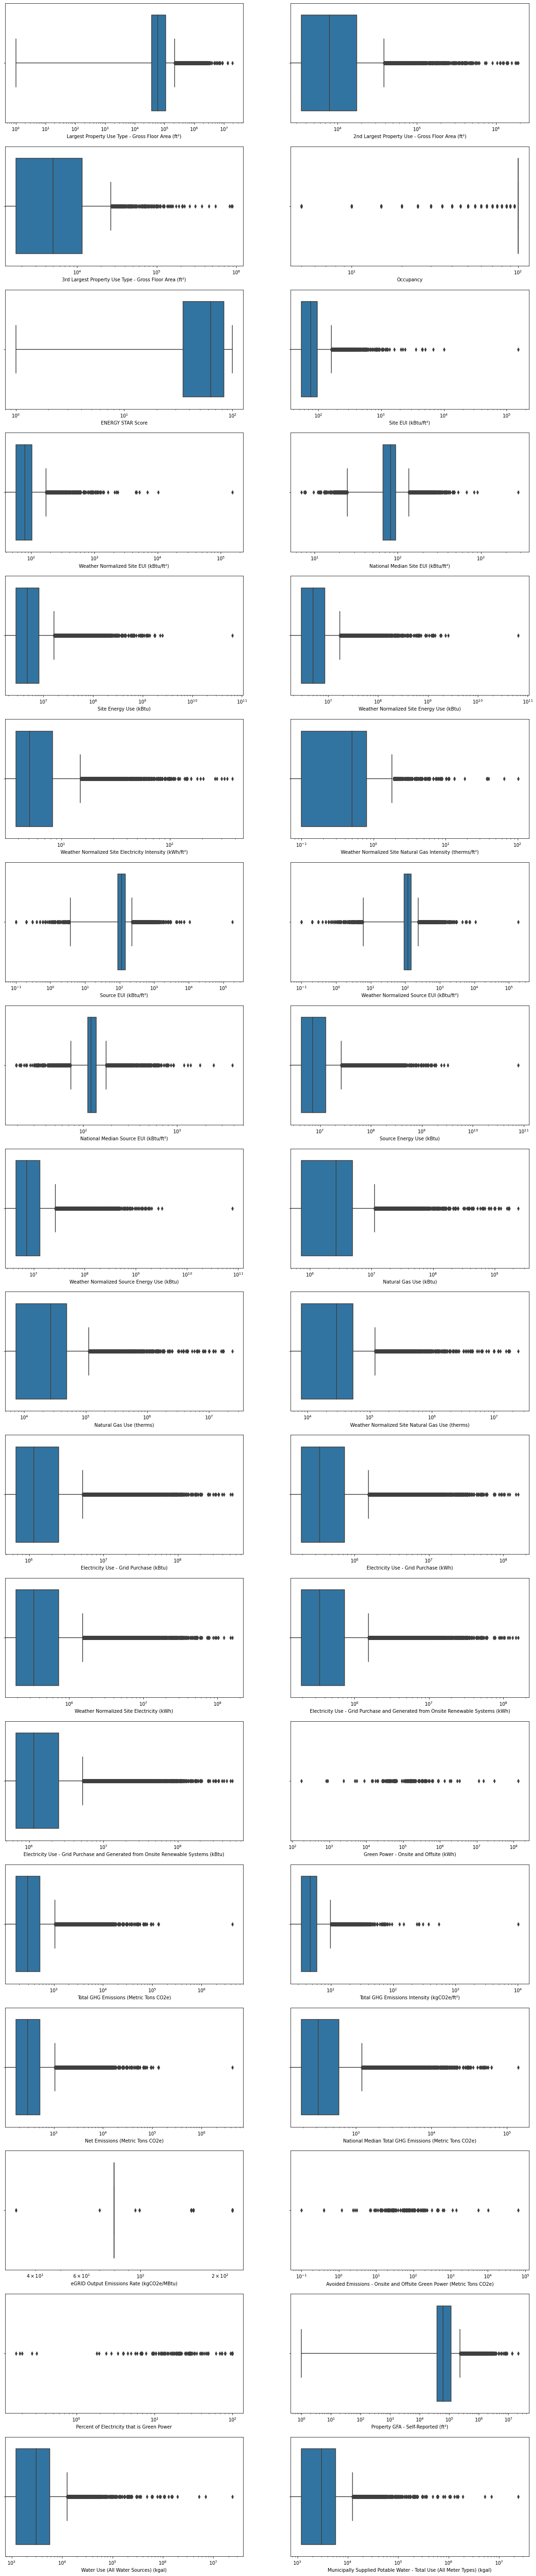

In [36]:
# Plotting boxplots

plt.figure(figsize=(20, 100))
for index, column in enumerate(cols_to_viz, 1):
    plt.subplot(18, 2, index)
    sns.boxplot(x=df[column])
    plt.xscale('log')
    plt.plot()


### As we can see all numeric columns have outliers. Hence the most useful strategy is to fill their missing values with median as per the corresponding Property Type.

In [37]:
cols_to_fill_na=df.select_dtypes(include='number').drop(columns=['Property Id', 'Largest Property Use Type - Gross Floor Area (ft²)',
                                                                 '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Longitude', 'Latitude',
                                                                'Year Built']).columns
cols_to_fill_na

Index(['Occupancy', 'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
       'Electricity Use - Grid Purchase and Generated from On

In [38]:
# Filling missing values with the medians of the corresponding Property Type

for column in cols_to_fill_na:
    median_values = df.groupby('Primary Property Type - Portfolio Manager-Calculated')[column].median()
    df[column] = df.apply(lambda row: median_values[row['Primary Property Type - Portfolio Manager-Calculated']] if pd.isna(row[column]) else row[column], axis=1)

In [39]:
create_null_df(df)

,Null Count
3rd Largest Property Use Type - Gross Floor Area (ft²),25342
2nd Largest Property Use - Gross Floor Area (ft²),20985
ENERGY STAR Score,2641
Longitude,936
NTA,936
Latitude,936
Borough,928
National Median Source EUI (kBtu/ft²),531
National Median Total GHG Emissions (Metric Tons CO2e),531
National Median Site EUI (kBtu/ft²),531


### Creating a new column named 'Area Under Usage' by summing the values of 'Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)', '3rd Largest Property Use Type - Gross Floor Area (ft²)' columns

In [40]:
# Adding the largest, 2nd largest and 3rd largest Gross Floor Area (GFA) into a single column named 'Area Under Usage (ft^2)'

df['Area Under Usage (ft^2)']=df[['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)',
                           '3rd Largest Property Use Type - Gross Floor Area (ft²)']].sum(axis=1, skipna=True)

In [41]:
# Now our features showing largest, 2nd largest and 3rd largest Gross Floor Area (GFA) are redundant
# We can safely remove them

df.drop(columns=['Largest Property Use Type - Gross Floor Area (ft²)', '2nd Largest Property Use - Gross Floor Area (ft²)',
                 '3rd Largest Property Use Type - Gross Floor Area (ft²)'], inplace=True)

In [42]:
create_null_df(df)

,Null Count
ENERGY STAR Score,2641
NTA,936
Longitude,936
Latitude,936
Borough,928
National Median Site EUI (kBtu/ft²),531
National Median Total GHG Emissions (Metric Tons CO2e),531
National Median Source EUI (kBtu/ft²),531
Water Use (All Water Sources) (kgal),9
Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),9


### We have some features without any location information. It would make our analysis useless if the records have no location information. Hence dropping records with no location information.

In [43]:
# Dropping records with no location information

loc_features_na=['NTA', 'Longitude', 'Latitude', 'Borough']
df.dropna(subset=loc_features_na, inplace=True)
df.reset_index(drop=True, inplace=True)

In [44]:
df.shape

(26875, 47)

In [45]:
null_df=create_null_df(df)
null_df

,Null Count
ENERGY STAR Score,2470
National Median Site EUI (kBtu/ft²),504
National Median Source EUI (kBtu/ft²),504
National Median Total GHG Emissions (Metric Tons CO2e),504
Water Use (All Water Sources) (kgal),9
Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),9
Weather Normalized Site Electricity Intensity (kWh/ft²),4
Electricity Use - Grid Purchase (kBtu),4
Electricity Use - Grid Purchase (kWh),4
Weather Normalized Site Electricity (kWh),4


### The rest of the null values are due to no corresponding median values available for that specific property type in the original dataset. Hence, the most appropriate way to fill them is with the median for the specific borough

In [46]:
null_features=null_df.index.tolist()
null_features

['ENERGY STAR Score',
 'National Median Site EUI (kBtu/ft²)',
 'National Median Source EUI (kBtu/ft²)',
 'National Median Total GHG Emissions (Metric Tons CO2e)',
 'Water Use (All Water Sources) (kgal)',
 'Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use - Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
 'Green Power - Onsite and Offsite (kWh)',
 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)',
 'Percent of Electricity that is Green Power']

In [47]:
# Imputing missing values as per the median for the corresponding borough

for column in null_features:
    median_values = df.groupby('Borough')[column].median()
    df[column] = df.apply(lambda row: median_values[row['Borough']] if pd.isna(row[column]) else row[column], axis=1)

### Removing inconsistencies in Postcodes

#### In our dataset, there are some postcodes which have length greater than 5 and thus, are inconsistent. We need to find them and correct them.

In [48]:
# Finding postcodes with string length greater than 5

df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
1219,111011128,QUEENS
1364,100381836,MANHATTAN
1430,110401433,QUEENS
2730,112213612,BROOKLYN
3817,112073442,BROOKLYN
4377,104541907,BRONX
4408,100016905,MANHATTAN
4896,100750264,MANHATTAN
5026,113783050,QUEENS
5032,111015107,QUEENS


### As we can see, the above dataframe shows the postcodes of length greater than 5. We will now correct them

In [49]:
#Correcting ZIP Codes for 'Manhattan' Borough

mask_manhattan=(df['Postcode'].str.len()>5) & (df['Borough']=='MANHATTAN')
mask_manhattan_df=df[mask_manhattan][['Postcode', 'Property Name','NTA', 'Borough']]
mask_manhattan_df['Postcode']=mask_manhattan_df['Postcode'].str[:5]
df.loc[mask_manhattan, 'Postcode']=mask_manhattan_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
1219,111011128,QUEENS
1430,110401433,QUEENS
2730,112213612,BROOKLYN
3817,112073442,BROOKLYN
4377,104541907,BRONX
5026,113783050,QUEENS
5032,111015107,QUEENS
5153,104693134,BRONX
6047,104573638,BRONX
6048,104575105,BRONX


In [50]:
#Correcting ZIP Codes for 'Queens' Borough

mask_queens=(df['Postcode'].str.len()>5) & (df['Borough']=='QUEENS')
mask_queens_df=df[mask_queens][['Postcode', 'Property Name','NTA', 'Borough']]
mask_queens_df['Postcode']=mask_queens_df['Postcode'].str[:5]
df.loc[mask_queens, 'Postcode']=mask_queens_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
2730,112213612,BROOKLYN
3817,112073442,BROOKLYN
4377,104541907,BRONX
5153,104693134,BRONX
6047,104573638,BRONX
6048,104575105,BRONX
6049,104575132,BRONX
6420,112063812,BROOKLYN
6453,112063812,BROOKLYN
10769,112074037,BROOKLYN


In [51]:
#Correcting ZIP Codes for 'Bronx' Borough

mask_bronx=(df['Postcode'].str.len()>5) & (df['Borough']=='BRONX')
mask_bronx_df=df[mask_bronx][['Postcode', 'Property Name','NTA', 'Borough']]
mask_bronx_df['Postcode']=mask_bronx_df['Postcode'].str[:5]
df.loc[mask_bronx, 'Postcode']=mask_bronx_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough
2730,112213612,BROOKLYN
3817,112073442,BROOKLYN
6420,112063812,BROOKLYN
6453,112063812,BROOKLYN
10769,112074037,BROOKLYN
10770,112074037,BROOKLYN
23579,112094412,BROOKLYN


In [52]:
#Correcting ZIP Codes for 'Brooklyn' Borough

mask_brooklyn=(df['Postcode'].str.len()>5) & (df['Borough']=='BROOKLYN')
mask_brooklyn_df=df[mask_brooklyn][['Postcode', 'Property Name','NTA', 'Borough']]
mask_brooklyn_df['Postcode']=mask_brooklyn_df['Postcode'].str[:5]
df.loc[mask_brooklyn, 'Postcode']=mask_brooklyn_df['Postcode']
df[df['Postcode'].str.len()>5][['Postcode', 'Borough']]

,Postcode,Borough


In [53]:
# Resetting the index 

df.reset_index(drop=True, inplace=True)

### Inspecting duplicate values

In [54]:
# Finding duplicate property ids

df[df.duplicated(subset=['Property Id'])]

,Property Id,Property Name,Address 1,Postcode,Primary Property Type - Portfolio Manager-Calculated,Year Built,Construction Status,Occupancy,Metered Areas (Energy),Metered Areas (Water),...,Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),Borough,NTA,Longitude,Latitude,Area Under Usage (ft^2)
1340,2597673,CBS-530,530 W57th St,10019,Office,1937,Existing,100,Whole Property,Whole Property,...,0.0,0.0,466063.0,33566.8,33566.80,MANHATTAN,Clinton,-73.990852,40.770073,466063.0
1342,2597674,CBS-513,513 W56th St,10019,Office,1984,Existing,100,Whole Property,Whole Property,...,0.0,0.0,183710.0,1131.8,1127.55,MANHATTAN,Clinton,-73.989541,40.768656,183710.0
1344,2597675,CBS-518,518 W57th St,10019,Office,1912,Existing,100,Whole Property,Whole Property,...,0.0,0.0,69677.0,5267.9,5267.90,MANHATTAN,Clinton,-73.989881,40.769664,69677.0
1359,2605548,600 Madison Avenue,600 Madison Avenue,10022,Office,2001,Existing,100,Whole Property,Whole Property,...,0.0,0.0,343305.0,8777.6,8777.60,MANHATTAN,Midtown-Midtown South,-73.972125,40.762629,343305.0
1531,2637884,12 W 72 St.,12 W 72 Street,10023,Multifamily Housing,1950,Existing,100,Whole Property,Whole Property,...,0.0,0.0,178893.0,5539.3,5539.30,MANHATTAN,Lincoln Square,-73.976889,40.776600,178893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25887,15583886,Spellman Hall,300 Howard Avenue,10301,Office,1935,Existing,100,Whole Property,Whole Property,...,0.0,0.0,10029.0,1131.8,1127.55,STATEN IS,Grymes Hill-Clifton-Fox Hills,-74.088569,40.622406,10029.0
25897,15583895,Flynn Hall,300 Howard Avenue,10301,Office,1935,Existing,100,Whole Property,Whole Property,...,0.0,0.0,17736.0,1131.8,1127.55,STATEN IS,Grymes Hill-Clifton-Fox Hills,-74.088569,40.622406,17736.0
26325,16057131,231 West 74th Street Corp,231 West 74th Street,10023,Multifamily Housing,1920,Existing,100,Whole Property,Whole Property,...,0.0,0.0,4440.0,3837.0,3837.75,MANHATTAN,Upper West Side,-73.982267,40.780609,4440.0
26327,16057132,233 West 74th Street Corp,233 West 74th Street,10023,Multifamily Housing,1920,Existing,100,Whole Property,Whole Property,...,0.0,0.0,4314.0,3837.0,3837.75,MANHATTAN,Upper West Side,-73.982516,40.780713,4314.0


In [55]:
df[df['Property Id']==2605548]

,Property Id,Property Name,Address 1,Postcode,Primary Property Type - Portfolio Manager-Calculated,Year Built,Construction Status,Occupancy,Metered Areas (Energy),Metered Areas (Water),...,Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal),Borough,NTA,Longitude,Latitude,Area Under Usage (ft^2)
1358,2605548,600 Madison Avenue,600 Madison Avenue,10022,Office,2001,Existing,100,Whole Property,Whole Property,...,0.0,0.0,343305.0,8777.6,8777.6,MANHATTAN,Midtown-Midtown South,-73.972125,40.762629,343305.0
1359,2605548,600 Madison Avenue,600 Madison Avenue,10022,Office,2001,Existing,100,Whole Property,Whole Property,...,0.0,0.0,343305.0,8777.6,8777.6,MANHATTAN,Midtown-Midtown South,-73.972125,40.762629,343305.0


### As we can see above, we have duplicate records and we need to remove those duplicate records

In [56]:
# Finding number of unique property ids and our dataset's number of records should match with the number of unique properties

df['Property Id'].nunique()

26673

In [57]:
# Dropping duplicate records

df.drop_duplicates(subset=['Property Id'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [58]:
df.shape

(26673, 47)

### As per metadeta definitions, there is a difference between the word 'Source' and 'Site'. Any feature associated/prefixed with word 'Source' basically means that it includes the value from its source to destination. For instance, 'Site Energy Use' includes not only the energy use but also the energy spent during energy generation and transmission. On the other hand, the word 'Source' in our dataset is solely associated to the property. Since, we are doing local analysis on NYC, we will focus on 'Site' features and remove 'Source' Features. Also some  columns like Natural Gas Use (kBtu) is just another repeated feature of Natural Gas Use (therms) but in different units. Hence, all such redundant features are required to be removed.

In [60]:
# Creating a list of redundant columns

red_col=['Site EUI (kBtu/ft²)','Site Energy Use (kBtu)', 'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)', 'Source Energy Use (kBtu)','Natural Gas Use (kBtu)',
       'Natural Gas Use (therms)', 'Weather Normalized Source Energy Use (kBtu)', 'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchase (kWh)','Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
        'Property GFA - Self-Reported (ft²)', 'Municipally Supplied Potable Water - Total Use (All Meter Types) (kgal)']

In [61]:
# Dropping redundant columns

df.drop(columns=red_col, inplace=True)

In [62]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated', 'Year Built',
       'Construction Status', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas (Water)', 'ENERGY STAR Score',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Weather Normalized Site Electricity (kWh)',
       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/ft²)',
       'Net Emissions (Metric Tons CO2e)',
       'National Median Total GHG Emissions (Metric Tons C

In [63]:
df.shape

(26673, 33)

In [64]:
cols_to_viz=df.select_dtypes('float64').columns.tolist()
features_to_remove=['ENERGY STAR Score', 'Longitude','Latitude']
cols=[feature for feature in cols_to_viz if feature not in features_to_remove]

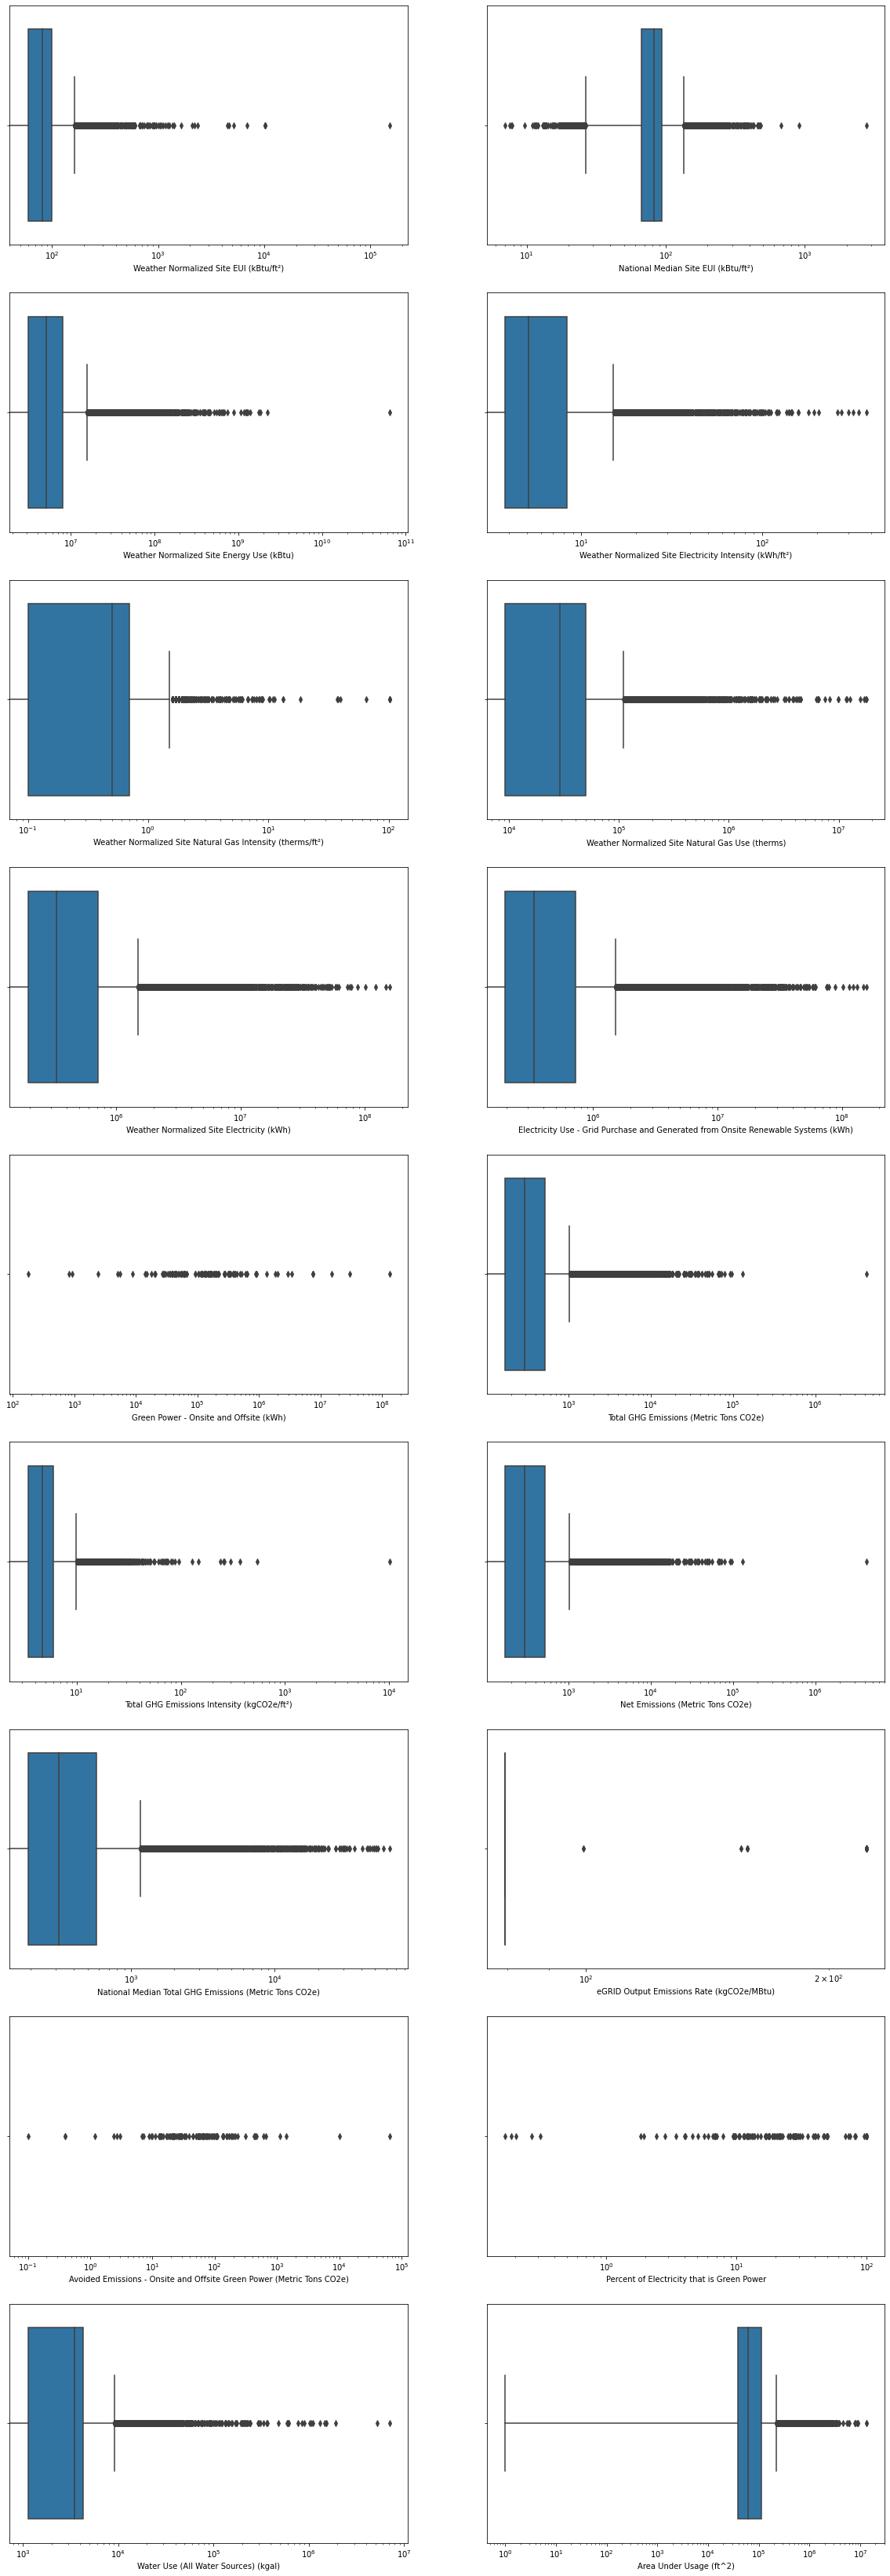

In [65]:
# Plotting a boxplot to check for any outlier

plt.figure(figsize=(20, 100))
for index, column in enumerate(cols, 1):
    plt.subplot(15, 2, index)
    sns.boxplot(x=df[column])
    plt.xscale('log')
    plt.plot()

### If we inspect box plots carefully, we can see that in some columns like 'Net Emissions', 'Total GHG Emissions Intensity', there is one abnormally high outlier value. Lets investigate it.

In [66]:
cols_of_interest=['Weather Normalized Site EUI (kBtu/ft²)','National Median Site EUI (kBtu/ft²)','Weather Normalized Site Energy Use (kBtu)','Total GHG Emissions (Metric Tons CO2e)','Total GHG Emissions Intensity (kgCO2e/ft²)','Net Emissions (Metric Tons CO2e)']

### We will use zscores from scipy module. Z Score is a statistical measure which quantifies the number of standard deviations a data point is far from the mean. For our project, we will set a threshold of 3 i.e. any datapoint whose zscore is more than 3 standard deviation away from the mean would be considered as outlier.

In [67]:
from scipy.stats import zscore

z_scores=df[cols_of_interest].apply(zscore)
outliers=(z_scores.abs()>3)
outliers

,Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Weather Normalized Site Energy Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
26668,False,False,False,False,False,False
26669,False,False,False,False,False,False
26670,False,False,False,False,False,False
26671,False,False,False,False,False,False


In [68]:
# Creating an outlier dataframe

outlier_df=df[outliers.any(axis=1)][cols_of_interest].reset_index(drop=True)

In [69]:
outlier_df.describe()

,Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Weather Normalized Site Energy Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e)
count,257.000000,257.000000,2.570000e+02,2.570000e+02,257.000000,2.570000e+02
mean,1024.917121,266.183658,3.752858e+08,2.398474e+04,58.824903,2.398474e+04
std,9557.104058,181.233849,3.998302e+09,2.652428e+05,630.283146,2.652428e+05
min,0.000000,40.100000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,116.500000,207.700000,6.104719e+06,2.690000e+02,5.300000,2.690000e+02
50%,209.400000,234.300000,1.449386e+07,7.416000e+02,12.400000,7.416000e+02
75%,267.700000,285.600000,8.529620e+07,6.307900e+03,18.100000,6.307900e+03
max,152021.000000,2789.100000,6.403643e+10,4.250523e+06,10090.600000,4.250523e+06


### As we can see from above summary statistic, we have our max value far greater than the 75th percentile. We need to find such records

In [70]:
# Finding 10 largest records for columns in outlier dataframe

for col in outlier_df:
    print(df[col].nlargest(10))

18179    152021.0
10516     10164.9
10718     10164.9
23671     10164.9
26576     10164.9
4732       6841.7
21362      5135.9
26506      4629.2
7567       4506.1
21369      2346.0
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64
10360    2789.1
13891     908.6
13886     672.4
10654     479.7
1443      476.7
19451     466.4
18700     459.7
3235      458.0
1630      454.5
1189      426.7
Name: National Median Site EUI (kBtu/ft²), dtype: float64
18179    6.403643e+10
21362    2.252251e+09
23751    1.849165e+09
20882    1.772348e+09
6755     1.386890e+09
7623     1.304938e+09
26506    1.275840e+09
8618     1.243622e+09
4732     1.220034e+09
7567     1.171664e+09
Name: Weather Normalized Site Energy Use (kBtu), dtype: float64
18179    4250523.3
21362     132207.6
20882      95510.5
23751      92410.2
6755       78844.2
8618       73126.4
7623       69640.7
7567       67510.9
4732       66091.7
26506      65718.5
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64
18179 

### From research, I found that almost all have correct high values but still there is one common index for every column which had unusually high values.

In [71]:
df.loc[18300]

Property Id                                                                                                        6739983
Property Name                                                                        Grogan & Associates - 2 Tudor City pl
Address 1                                                                                                  2 Tudor City pl
Postcode                                                                                                             10017
Primary Property Type - Portfolio Manager-Calculated                                                   Multifamily Housing
Year Built                                                                                                            1955
Construction Status                                                                                               Existing
Occupancy                                                                                                              100
Metered Areas (E

### The values for the above record for certain columns are simply not possible. Hence, we will replace with more appropriate value by taking the median value of its property type i.e. 'Senior Care Community'

In [72]:
medians=df.groupby('Primary Property Type - Portfolio Manager-Calculated')[cols_of_interest].median()
medians

,Weather Normalized Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Weather Normalized Site Energy Use (kBtu),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e)
Primary Property Type - Portfolio Manager-Calculated,,,,,,
Adult Education,72.30,56.50,3.694891e+06,210.00,4.50,210.00
Ambulatory Surgical Center,205.45,73.05,3.589949e+07,2757.25,14.80,2757.25
Automobile Dealership,70.80,66.65,4.201215e+06,230.15,4.50,230.15
Bank Branch,69.85,89.65,2.716589e+06,179.90,4.85,179.90
Bar/Nightclub,126.90,193.90,3.604760e+06,214.40,7.50,214.40
...,...,...,...,...,...,...
Vocational School,65.10,54.40,6.035307e+06,380.50,4.10,380.50
Wastewater Treatment Plant,219.90,204.70,1.643100e+08,12211.70,16.10,12211.70
Wholesale Club/Supercenter,85.00,71.80,1.627068e+07,1146.30,5.80,1146.30


In [73]:
# Replacing value of the record with index 18300

for col in cols_of_interest:
    df.loc[18300, col]=medians.loc['Senior Care Community', col]

In [74]:
for col in outlier_df:
    print(df[col].nlargest(10))

18179    152021.0
10516     10164.9
10718     10164.9
23671     10164.9
26576     10164.9
4732       6841.7
21362      5135.9
26506      4629.2
7567       4506.1
21369      2346.0
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64
10360    2789.1
13891     908.6
13886     672.4
10654     479.7
1443      476.7
19451     466.4
18700     459.7
3235      458.0
1630      454.5
1189      426.7
Name: National Median Site EUI (kBtu/ft²), dtype: float64
18179    6.403643e+10
21362    2.252251e+09
23751    1.849165e+09
20882    1.772348e+09
6755     1.386890e+09
7623     1.304938e+09
26506    1.275840e+09
8618     1.243622e+09
4732     1.220034e+09
7567     1.171664e+09
Name: Weather Normalized Site Energy Use (kBtu), dtype: float64
18179    4250523.3
21362     132207.6
20882      95510.5
23751      92410.2
6755       78844.2
8618       73126.4
7623       69640.7
7567       67510.9
4732       66091.7
26506      65718.5
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64
18179 

### Now our extreme outlier is handled and we can move on further analysis.

### Some values in 'Year Built' is incorrect. We should correct them and remove those whose information is not found on internet.

In [77]:
df[(df['Year Built']<1800) | (df['Year Built']>2020)][['Property Id', 'Property Name','Address 1', 'Year Built', 'Borough']]

,Property Id,Property Name,Address 1,Year Built,Borough
9965,5214338,East Island Mgmt,10236 64th Ave,1649,QUEENS
17362,6690462,HPHW Realty Corp,604 Pacific Street,2021,BROOKLYN
18463,6772436,Queens Quality Management - 6541 Booth st,6541 Booth st,1393,QUEENS
20477,7126159,95 Rockwell Place,95 Rockwell Place,2022,BROOKLYN
21288,8705078,2077 5th Avenue St. Claire on Fifth Condominium,2077 5th Avenue,2088,MANHATTAN
23749,12344301,"BBL 2-05900-0150: Van Cortlandt Park, DPR (LL84)",6200 Broadway,1749,BRONX
26376,16734560,JLL - 154 Morgan ave,154 Morgan ave,1367,BROOKLYN


### The above dataframe shows the records with inconsistent values in 'Year Built'. For records 17362 and 20477, the values were correct, but the rest had to be corrected using external sources.

In [78]:
# Correcting 'Year Built' values

df.loc[df.index==9965, 'Year Built']=1949
df.loc[df.index==18463, 'Year Built']=1939
df.loc[df.index==21288, 'Year Built']=2007
df.loc[df.index==26376, 'Year Built']=1967

In [79]:
df[(df['Year Built']<1800) | (df['Year Built']>2022)][['Property Id', 'Property Name','Address 1', 'Year Built', 'Borough']]

,Property Id,Property Name,Address 1,Year Built,Borough
23749,12344301,"BBL 2-05900-0150: Van Cortlandt Park, DPR (LL84)",6200 Broadway,1749,BRONX


### The above property had no information regarding when it was built. Hence, we will remove it

In [80]:
# Dropping the record 23749

df.drop(index=23749, inplace=True)

In [81]:
# Resetting the index

df.reset_index(drop=True, inplace=True)

In [83]:
df['Year Built'].describe()

count    26672.000000
mean      1949.031906
std         34.066539
min       1800.000000
25%       1925.000000
50%       1937.000000
75%       1971.000000
max       2022.000000
Name: Year Built, dtype: float64

# Exploratory Data Analysis (EDA)

#### Questions

Q-1) Which types of buildings have the highest net emissions?  
Q-2) Which borough/locality have the highest energy consumption?  
Q-3) Which type of buildings haave highest water usage?  
Q-3) Which type of buildings have very high energy intensity?

In [84]:
# Finding property types as per their net emissions

net_emissions_by_type=pd.DataFrame(df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Net Emissions (Metric Tons CO2e)'].median().nlargest(10))
net_emissions_by_type

,Net Emissions (Metric Tons CO2e)
Primary Property Type - Portfolio Manager-Calculated,
Wastewater Treatment Plant,12211.70
Zoo,10432.25
Data Center,4669.85
Hospital (General Medical & Surgical),4456.60
Financial Office,3069.70
Other - Specialty Hospital,3049.10
Ambulatory Surgical Center,2757.25
Enclosed Mall,2410.20
Prison/Incarceration,1939.40


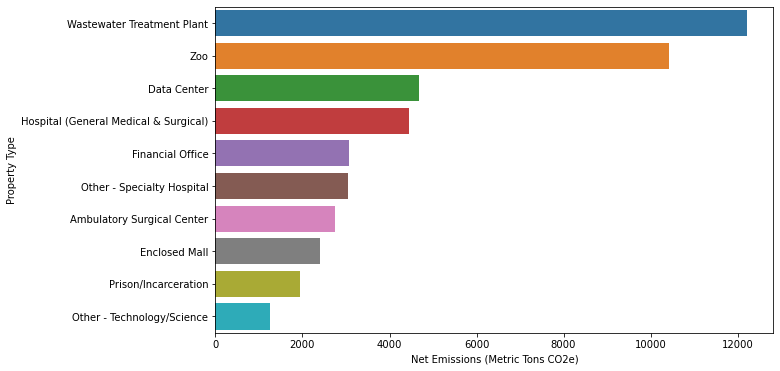

In [85]:
# Visualizing the chart 'Net Emissions by Property Type'

plt.rcParams['figure.figsize']=(10, 6)
sns.barplot(data=net_emissions_by_type, y=net_emissions_by_type.index, x=net_emissions_by_type.values.ravel())
plt.xlabel('Net Emissions (Metric Tons CO2e)')
plt.ylabel('Property Type')
plt.show()

#### Categories namely Wastewater Treatment Plant, Zoo, Data Center, Hospital (General Medical & Surgical) and Financial Office have the highest net emissions in NYC                     

### Finding which Property Type has median higher emissions intensity i.e. emission per sq. feet


In [86]:
# Finding property types as per their GHG Emissions Intensity

emission_intensity_by_type=pd.DataFrame(df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Total GHG Emissions Intensity (kgCO2e/ft²)'].median().nlargest(10))
emission_intensity_by_type

,Total GHG Emissions Intensity (kgCO2e/ft²)
Primary Property Type - Portfolio Manager-Calculated,
Zoo,21.8
Data Center,21.6
Ice/Curling Rink,18.9
Other - Technology/Science,17.9
Wastewater Treatment Plant,16.1
Veterinary Office,15.9
Supermarket/Grocery Store,14.9
Ambulatory Surgical Center,14.8
Other - Specialty Hospital,14.7


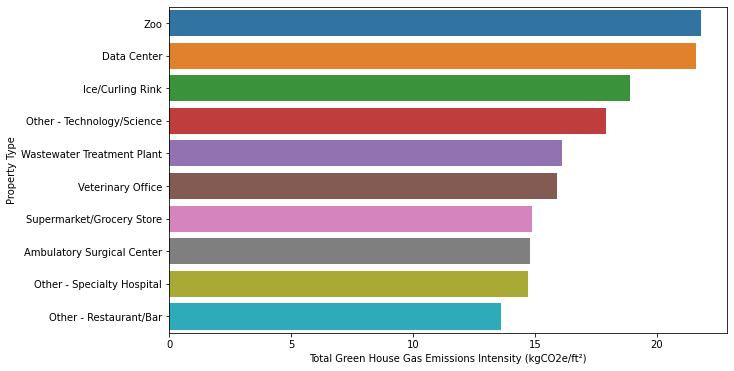

In [87]:
# Plotting a barplot named 'Property Types by Emissions Intensity'

sns.barplot(data=emission_intensity_by_type, y=emission_intensity_by_type.index, x=emission_intensity_by_type.values.ravel())
plt.xlabel('Total Green House Gas Emissions Intensity (kgCO2e/ft²)')
plt.ylabel('Property Type')
plt.show()

### From the above two charts, apart from utility and recreational facilities, data centers are common in both chart. Many studies have shown that data centers have high energy usage and thereby high emissions. As the businesses become more data driven and the due to the current dawn of generative AIs, governments and corporations will need to invest more to lessen imapct of data centers on our environment.

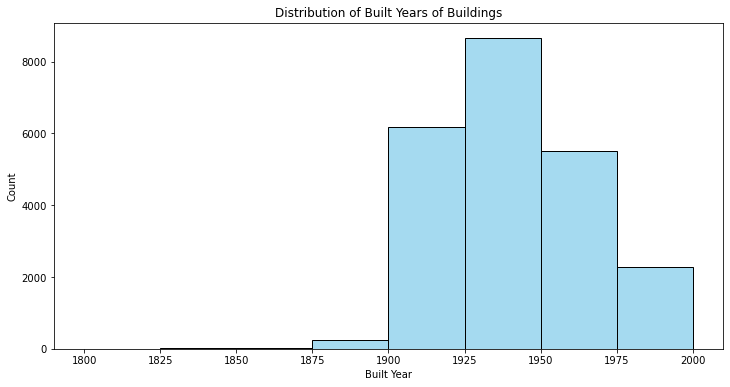

In [88]:
# Creating a histogram of number of buildings as per their age

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=df['Year Built'], bins=range(1800, 2023, 25), kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Built Years of Buildings')
plt.xlabel('Built Year')
plt.ylabel('Count')
plt.show()

### The ENERGY STAR Score is a measure of how well your property is performing relative to similar properties, when normalized for climate and operational characteristics. The 1-100 scale is set so that 1 represents the worst performing buildings and 100 represents the best performing buildings. A score of 50 indicates that a building is performing at the national median, taking into account its size, location, and operating parameters. A score of 75 indicates that a property is performing in the 75th percentile.

Text(46, 1700, 'National Median=50')

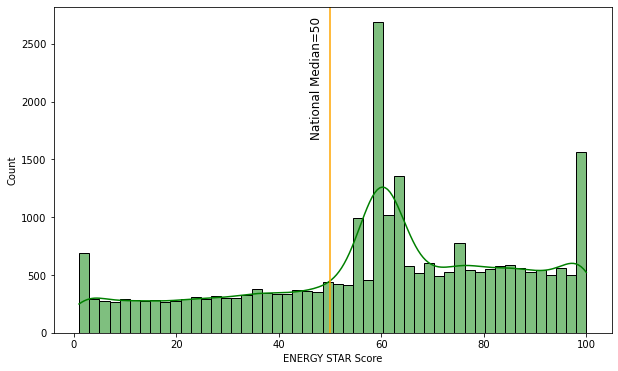

In [89]:
sns.histplot(df['ENERGY STAR Score'], bins=50, kde=True, color='green')
plt.axvline(x=50, color='orange')
plt.text(46,1700, 'National Median=50', rotation=90, fontsize=12, )

### As we can see that higher proportion of NYC buildings are having scores greater than 50 i.e. higher than the national median. Thus the city is doing well as compared to national medians and hence with proper energy sutainability measures, it can set an example for the country.

### Analyzing water usage

In [90]:
# Finding water usage by property type

water_usage_df=pd.DataFrame(df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Water Use (All Water Sources) (kgal)'].median().nlargest(10))
water_usage_df

,Water Use (All Water Sources) (kgal)
Primary Property Type - Portfolio Manager-Calculated,
Data Center,25317.50
Stadium (Open),9154.30
Senior Care Community,8851.70
Other - Specialty Hospital,8585.40
Financial Office,7994.80
Other - Technology/Science,7582.00
Senior Living Community,7125.90
Other - Restaurant/Bar,6629.85
Residential Care Facility,5478.10


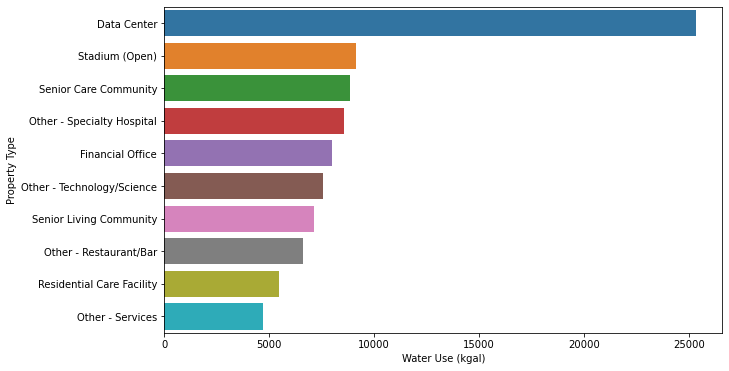

In [91]:
# Plotting a bar chart named 'Water Usage by Property Use'

sns.barplot(data=water_usage_df, y=water_usage_df.index, x=water_usage_df.values.ravel())
plt.xlabel('Water Use (kgal)')
plt.ylabel('Property Type')
plt.show()

### It is noteworthy that data centers have high water consumption too due to constant need of cooling the machinery. 

### Analyzing the energy usage borough wise

In [92]:
df.groupby('Borough')['Weather Normalized Site Energy Use (kBtu)'].median().nlargest()

Borough
MANHATTAN    5538973.25
BRONX        5110458.50
QUEENS       5110458.50
BROOKLYN     4427086.40
STATEN IS    4375818.60
Name: Weather Normalized Site Energy Use (kBtu), dtype: float64

In [93]:
df.groupby('Borough')['Weather Normalized Site Natural Gas Use (therms)'].median().nlargest()

Borough
QUEENS       34055.95
BROOKLYN     33589.10
BRONX        31180.50
STATEN IS    24514.80
MANHATTAN    21243.55
Name: Weather Normalized Site Natural Gas Use (therms), dtype: float64

#### The gas usage of all suburban boroughs are higher than the business district of Manhattan but the overall energy consumption (which also takes electricity into account) is still higher for Manhattan

In [94]:
df.groupby('Borough')['Weather Normalized Site Electricity Intensity (kWh/ft²)'].median().nlargest()

Borough
MANHATTAN    6.3
STATEN IS    6.0
BRONX        4.7
QUEENS       4.7
BROOKLYN     4.5
Name: Weather Normalized Site Electricity Intensity (kWh/ft²), dtype: float64

### We can see above that Manhattan's electricity intensity is also higher as compared to other boroughs

### Visualizing a correlation heatmap

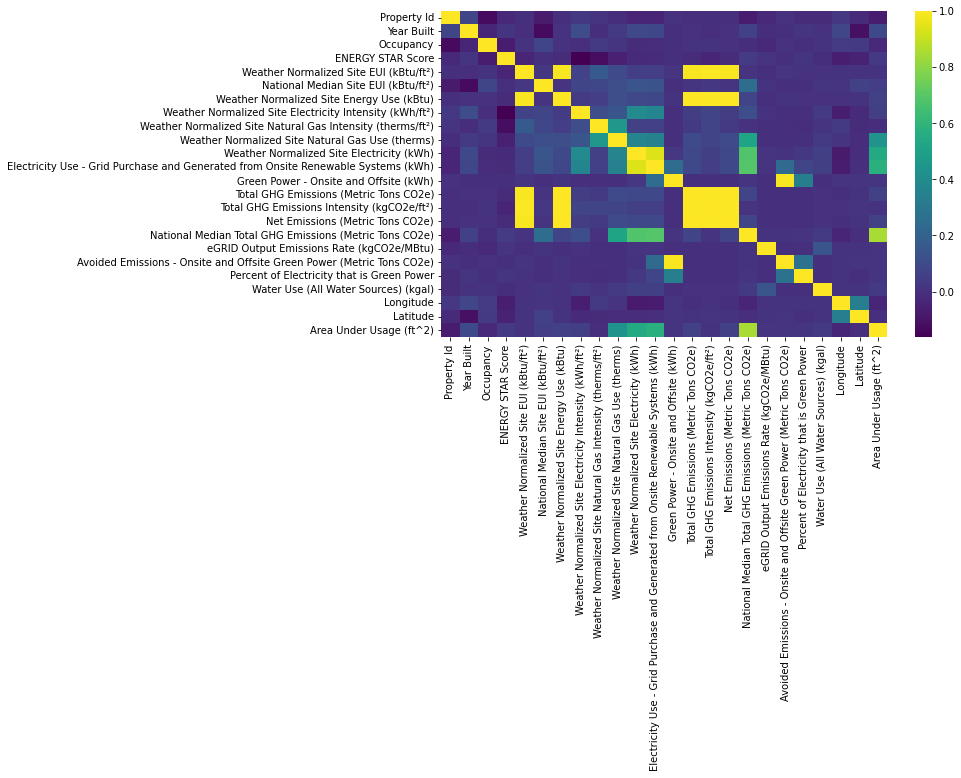

In [95]:
# Plotting the correlation heatmap

sns.heatmap(df.corr(), cmap='viridis')
plt.show()

In [96]:
# Finding top 10 highly correlated pairs

correlation_matrix = df.corr()

# Creating a mask to exclude duplicate and self-correlations
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Stacking the correlation matrix and reset the index
stacked_corr = correlation_matrix.stack()[mask.flatten()]

# Getting the top 10 correlated pairs (absolute values)
top_correlations = stacked_corr.abs().nlargest(10)

# Displaying the top 10 correlated pairs
print(top_correlations)

Total GHG Emissions (Metric Tons CO2e)      Net Emissions (Metric Tons CO2e)              0.999997
Weather Normalized Site Energy Use (kBtu)   Total GHG Emissions (Metric Tons CO2e)        0.999239
                                            Net Emissions (Metric Tons CO2e)              0.999236
Total GHG Emissions Intensity (kgCO2e/ft²)  Net Emissions (Metric Tons CO2e)              0.994871
Total GHG Emissions (Metric Tons CO2e)      Total GHG Emissions Intensity (kgCO2e/ft²)    0.994869
Weather Normalized Site Energy Use (kBtu)   Total GHG Emissions Intensity (kgCO2e/ft²)    0.994215
Weather Normalized Site EUI (kBtu/ft²)      Total GHG Emissions Intensity (kgCO2e/ft²)    0.992615
                                            Weather Normalized Site Energy Use (kBtu)     0.989112
                                            Net Emissions (Metric Tons CO2e)              0.987052
                                            Total GHG Emissions (Metric Tons CO2e)        0.987048
dtype: flo

### Above are the pairs of highly correlated features. 

### Answers of the questions that we framed earlier:

Q) Which types of buildings have the highest net emissions?  
A) Generally utility, government and hospital buildings had higher emissions (by total and intensity) but data centers were also found to be highly energy intensive. 


Q) Which borough/locality have the highest energy consumption?   
A) If we consider the gas usage, boroughs namely Bronx and Queens had higher usage but Manhattan lead in electricity consumption.


Q) Which type of buildings have highest water usage?  
A) Data Centers were the water guzzling property type in this segment. Also, stadiums, hospital and offices had high median consumption of water.


Q) Which type of buildings have very high energy intensity?  
A) Recreational Facilites had understandably high energy intensity, but here too, data center was the 2nd most energy intensive property.

### Our Exploratory Data Analysis is over and we will move towards machine learning

# Model Implementation

### 'Weather Normalized Site Energy Use (kBtu)' is our target feature


In [97]:
numerical_features=df.select_dtypes(include=['float', 'int']).drop(columns=['Property Id', 'Longitude','Latitude'])

In [98]:
cat_features=df.select_dtypes('object').drop(columns=['Property Name', 'Address 1', 'Postcode'])


In [99]:
X=df.drop(columns=['Weather Normalized Site Energy Use (kBtu)']).values
y=df['Weather Normalized Site Energy Use (kBtu)']

In [100]:
final_df=pd.concat([cat_features, numerical_features], axis=1)
final_df.shape

(26672, 27)

### Machine Learning


In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor


In [102]:
numerical_features = final_df.select_dtypes(include=['float', 'int']).columns
cat_features = final_df.select_dtypes(include=['object']).columns

In [103]:
enc=OneHotEncoder()
encoded_features=enc.fit_transform(final_df[cat_features])
encoded_features_df=pd.DataFrame(encoded_features.toarray(), columns=enc.get_feature_names_out(cat_features))

In [104]:
scalar=StandardScaler()
df[numerical_features]=scalar.fit_transform(df[numerical_features])

In [105]:
encoded_standardized_df=pd.concat([encoded_features_df, df[numerical_features]], axis=1)
encoded_standardized_df

,Primary Property Type - Portfolio Manager-Calculated_Adult Education,Primary Property Type - Portfolio Manager-Calculated_Ambulatory Surgical Center,Primary Property Type - Portfolio Manager-Calculated_Automobile Dealership,Primary Property Type - Portfolio Manager-Calculated_Bank Branch,Primary Property Type - Portfolio Manager-Calculated_Bar/Nightclub,Primary Property Type - Portfolio Manager-Calculated_Bowling Alley,Primary Property Type - Portfolio Manager-Calculated_College/University,Primary Property Type - Portfolio Manager-Calculated_Convention Center,Primary Property Type - Portfolio Manager-Calculated_Courthouse,Primary Property Type - Portfolio Manager-Calculated_Data Center,...,Green Power - Onsite and Offsite (kWh),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/ft²),Net Emissions (Metric Tons CO2e),National Median Total GHG Emissions (Metric Tons CO2e),eGRID Output Emissions Rate (kgCO2e/MBtu),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Percent of Electricity that is Green Power,Water Use (All Water Sources) (kgal),Area Under Usage (ft^2)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,0.053313,-0.037718,0.053334,1.753405,-0.031974,-0.008155,-0.046434,-0.069273,2.092370
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,0.206179,0.170067,0.206201,1.620144,-0.031974,-0.008155,-0.046434,-0.005337,0.975797
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,0.061615,-0.021611,0.061637,1.574286,-0.031974,-0.008155,-0.046434,0.043414,1.688787
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,0.046166,-0.007114,0.046188,1.207875,-0.031974,-0.008155,-0.046434,-0.069273,0.999597
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,0.313074,0.000940,0.313096,4.952800,-0.031974,-0.008155,-0.046434,-0.069273,5.471337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,-0.023496,0.023490,-0.023475,-0.239379,-0.031974,-0.008155,-0.046434,0.029147,-0.346445
26668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,-0.030539,-0.089262,-0.030518,-0.342843,-0.031974,-0.008155,-0.046434,-0.082926,-0.325425
26669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,-0.030539,-0.089262,-0.030518,-0.332287,-0.031974,-0.008155,-0.046434,-0.082926,-0.289466
26670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010238,-0.025207,-0.003893,-0.025186,-0.293637,-0.031974,-0.008155,-0.046434,-0.058488,-0.347309


In [106]:
X=encoded_standardized_df.drop(columns=['Weather Normalized Site Energy Use (kBtu)']).values
y=encoded_standardized_df['Weather Normalized Site Energy Use (kBtu)'].values

In [107]:
algorithms = {
    'Ridge Regression (L2)': Ridge(),
    'Lasso Regression (L1)': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'SVM Regressor': SVR(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'MLP Regressor': MLPRegressor()
}

# Initialize results dictionary to store model performance metrics
results = {}

In [108]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [109]:
for name, model in algorithms.items():
    # Train the model on the preprocessed training set
    model.fit(X_train, y_train)

    # Predict on the preprocessed test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]  # Number of samples in the test set
    p = X_test.shape[1]  # Number of features in the test set
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Adjusted R2': adj_r2
    }

    print(f"{name} - Mean Squared Error: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

Ridge Regression (L2) - Mean Squared Error: 0.00, RMSE: 0.02, R2: 0.8550, Adjusted R2: 0.8460
Lasso Regression (L1) - Mean Squared Error: 0.00, RMSE: 0.05, R2: 0.3037, Adjusted R2: 0.2608
Decision Tree Regression - Mean Squared Error: 0.00, RMSE: 0.02, R2: 0.8899, Adjusted R2: 0.8831
SVM Regressor - Mean Squared Error: 0.00, RMSE: 0.04, R2: 0.3696, Adjusted R2: 0.3308
KNN - Mean Squared Error: 0.00, RMSE: 0.02, R2: 0.8129, Adjusted R2: 0.8014
Random Forest - Mean Squared Error: 0.00, RMSE: 0.01, R2: 0.9499, Adjusted R2: 0.9468
MLP Regressor - Mean Squared Error: 0.00, RMSE: 0.05, R2: 0.3059, Adjusted R2: 0.2631


In [111]:
# Hyperparameter Tuning using GridSearchCV
param_grids = {
    'Ridge Regression (L2)': {'alpha': [0.1, 1, 10]},
    'Lasso Regression (L1)': {'alpha': [0.1, 1, 10]},
    'Decision Tree Regression': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'SVM Regressor': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Random Forest': {'n_estimators': [50, 70, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'MLP Regressor':{'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh'],
                     'alpha': [0.0001, 0.001, 0.01], 'max_iter': [200, 300, 400]}
}

In [112]:
#Initialize GridSearchCV for each algorithm
grid_searches = {}
for name, model in algorithms.items():
    if name in param_grids:
        param_grid = param_grids[name]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        grid_searches[name] = grid_search

In [113]:
cv_results = {}

for name, model in algorithms.items():
    # Cross-validation using neg_mean_squared_error (negative because GridSearchCV maximizes scores)
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate metrics
    mse_cv = -cv_score.mean()
    rmse_cv = np.sqrt(mse_cv)
    r2_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    n_cv = X_train.shape[0]  # Number of samples in the training set
    p_cv = X_train.shape[1]  # Number of features in the training set
    adj_r2_cv = 1 - (1 - r2_cv) * ((n_cv - 1) / (n_cv - p_cv - 1))
    
    # Store results
    cv_results[name] = {
        'MSE': mse_cv,
        'RMSE': rmse_cv,
        'R2': r2_cv,
        'Adjusted R2': adj_r2_cv
    }
    
    print(f"{name} - Cross-Validation Mean Squared Error: {mse_cv:.2f}, RMSE: {rmse_cv:.2f}, R2: {r2_cv:.4f}, Adjusted R2: {adj_r2_cv:.4f}")

Ridge Regression (L2) - Cross-Validation Mean Squared Error: 0.04, RMSE: 0.19, R2: 0.9018, Adjusted R2: 0.9003
Lasso Regression (L1) - Cross-Validation Mean Squared Error: 1.24, RMSE: 1.12, R2: 0.4034, Adjusted R2: 0.3946
Decision Tree Regression - Cross-Validation Mean Squared Error: 1.19, RMSE: 1.09, R2: 0.6017, Adjusted R2: 0.5958
SVM Regressor - Cross-Validation Mean Squared Error: 1.24, RMSE: 1.11, R2: 0.2639, Adjusted R2: 0.2530
KNN - Cross-Validation Mean Squared Error: 1.21, RMSE: 1.10, R2: 0.6119, Adjusted R2: 0.6062
Random Forest - Cross-Validation Mean Squared Error: 1.20, RMSE: 1.10, R2: 0.6742, Adjusted R2: 0.6694
MLP Regressor - Cross-Validation Mean Squared Error: 0.22, RMSE: 0.47, R2: -0.7968, Adjusted R2: -0.8233


In [114]:
best_model_name = min(cv_results, key=lambda k: cv_results[k]['MSE'])
best_grid_search = grid_searches[best_model_name]
best_model = best_grid_search.best_estimator_
best_params = best_grid_search.best_params_
best_score = -best_grid_search.best_score_ 

In [115]:
print(f"Best Model: {best_model_name}")
print(f"  Model: {best_model}")
print(f"  Hyperparameters: {best_params}")
print(f"  Cross-Validation Score: {best_score:.4f}")

Best Model: Ridge Regression (L2)
  Model: Ridge(alpha=0.1)
  Hyperparameters: {'alpha': 0.1}
  Cross-Validation Score: 0.0312


### Our best model is Ridge Regression (L2) wih the adjusted R2 Score of 0.90 and Cross Validation score of 0.0312

In [125]:
model=Ridge(alpha=0.1)

In [126]:
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [127]:
y_pred=model.predict(X_test)

In [129]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R^2
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R^2
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of features (predictors) in the test set
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print the metrics
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adj_r2:.4f}")

MSE: 0.0004
RMSE: 0.0207
R^2: 0.8563
Adjusted R^2: 0.8474


### Comparison of models

#### Comparing different models using  R2 Score

In [130]:
metric_df=pd.DataFrame({
    'Model': ['Lasso Regression (L1)','Ridge Regression (L2)', 'Decision Tree Regression', 'SVM Regressor', 'KNN', 'Random Forest', 'MLP Regressor'],
    'R2 Score': [0.4034, 0.9018, 0.6017, 0.2639, 0.6119, 0.6742, -0.7968]    
})
metric_df

,Model,R2 Score
0,Lasso Regression (L1),0.4034
1,Ridge Regression (L2),0.9018
2,Decision Tree Regression,0.6017
3,SVM Regressor,0.2639
4,KNN,0.6119
5,Random Forest,0.6742
6,MLP Regressor,-0.7968


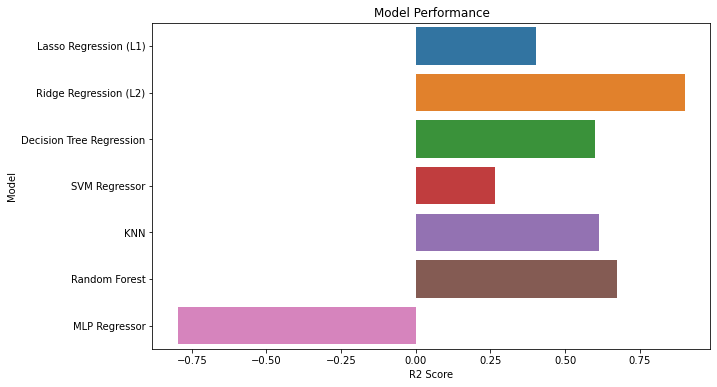

In [132]:
sns.barplot(x=metric_df['R2 Score'], y=metric_df['Model'])
plt.title('Model Performance')
plt.show()

In [122]:
# final_df.to_csv('data/final_df_2.csv', index=False)

### Finding the weights assigned to different features by the Ridge Regression Model

In [133]:
ridge_coeff=model.coef_
feature_names=encoded_standardized_df.drop(columns=['Weather Normalized Site Energy Use (kBtu)']).columns.tolist()
coeff_df=pd.DataFrame({
    'Feature': feature_names,
    'Weights Assigned': ridge_coeff
})

coeff_df=coeff_df.reindex(coeff_df['Weights Assigned'].abs().sort_values(ascending=False).index).reset_index(drop=True)[:10]
coeff_df['Weights Assigned']=coeff_df['Weights Assigned'].abs()
coeff_df

,Feature,Weights Assigned
0,Primary Property Type - Portfolio Manager-Calc...,0.490517
1,Weather Normalized Site EUI (kBtu/ft²),0.446098
2,Total GHG Emissions (Metric Tons CO2e),0.354314
3,Net Emissions (Metric Tons CO2e),0.352485
4,NTA_Rikers Island,0.339625
5,Primary Property Type - Portfolio Manager-Calc...,0.284080
6,Total GHG Emissions Intensity (kgCO2e/ft²),0.150006
7,Primary Property Type - Portfolio Manager-Calc...,0.144762
8,NTA_Glen Oaks-Floral Park-New Hyde Park,0.068998
9,Primary Property Type - Portfolio Manager-Calc...,0.063984


In [134]:
pd.set_option('display.max_colwidth', None)
coeff_df

,Feature,Weights Assigned
0,Primary Property Type - Portfolio Manager-Calculated_Energy/Power Station,0.490517
1,Weather Normalized Site EUI (kBtu/ft²),0.446098
2,Total GHG Emissions (Metric Tons CO2e),0.354314
3,Net Emissions (Metric Tons CO2e),0.352485
4,NTA_Rikers Island,0.339625
5,Primary Property Type - Portfolio Manager-Calculated_Stadium (Open),0.284080
6,Total GHG Emissions Intensity (kgCO2e/ft²),0.150006
7,Primary Property Type - Portfolio Manager-Calculated_Indoor Arena,0.144762
8,NTA_Glen Oaks-Floral Park-New Hyde Park,0.068998
9,Primary Property Type - Portfolio Manager-Calculated_Other - Specialty Hospital,0.063984
